# Actividad Integradora 1

Construccion de un modelo de regressión lineal de los datos obtenidos de la grafica de "Total Cases" de https://www.worldometers.info/coronavirus/

## Recolección de datos
Utilizando beautiful soup, realizamos un scrapping de los datos

In [10]:
# !pip install slimit
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

URL = 'https://www.worldometers.info/coronavirus/'

page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
contents = soup.find_all('script',type="text/javascript")

In [2]:
data=None
for content in contents:
    if(content.string != None):
        if "Daily Cases" in content.string:
            data=content.string
            
data=data.replace('\n', '').replace(' ', '')
index_data=data.index("{categories:")
index_data_end=data.index(",yAxis")

dates=data[index_data:index_data_end]
dates=dates.replace('categories', '"categories"')
json_dates=json.loads(dates)
json_dates['categories']



['Jan22',
 'Jan23',
 'Jan24',
 'Jan25',
 'Jan26',
 'Jan27',
 'Jan28',
 'Jan29',
 'Jan30',
 'Jan31',
 'Feb01',
 'Feb02',
 'Feb03',
 'Feb04',
 'Feb05',
 'Feb06',
 'Feb07',
 'Feb08',
 'Feb09',
 'Feb10',
 'Feb11',
 'Feb12',
 'Feb13',
 'Feb14',
 'Feb15',
 'Feb16',
 'Feb17',
 'Feb18',
 'Feb19',
 'Feb20',
 'Feb21',
 'Feb22',
 'Feb23',
 'Feb24',
 'Feb25',
 'Feb26',
 'Feb27',
 'Feb28',
 'Feb29',
 'Mar01',
 'Mar02',
 'Mar03',
 'Mar04',
 'Mar05',
 'Mar06',
 'Mar07',
 'Mar08',
 'Mar09',
 'Mar10',
 'Mar11',
 'Mar12',
 'Mar13',
 'Mar14',
 'Mar15',
 'Mar16',
 'Mar17',
 'Mar18',
 'Mar19',
 'Mar20',
 'Mar21',
 'Mar22',
 'Mar23',
 'Mar24',
 'Mar25',
 'Mar26',
 'Mar27',
 'Mar28',
 'Mar29',
 'Mar30',
 'Mar31',
 'Apr01',
 'Apr02',
 'Apr03',
 'Apr04',
 'Apr05',
 'Apr06',
 'Apr07',
 'Apr08',
 'Apr09',
 'Apr10',
 'Apr11',
 'Apr12',
 'Apr13',
 'Apr14',
 'Apr15',
 'Apr16',
 'Apr17',
 'Apr18',
 'Apr19',
 'Apr20',
 'Apr21',
 'Apr22',
 'Apr23',
 'Apr24',
 'Apr25',
 'Apr26',
 'Apr27',
 'Apr28',
 'Apr29',
 'Apr30',


In [3]:
start_index = data.index("data:[null")
end_index = data.index(",{name:")

cases = "{" + data[start_index:end_index]
cases=cases.replace('data', '"data"')
json_cases=json.loads(cases)
json_cases['data']

[None,
 267,
 473,
 699,
 786,
 1784,
 1478,
 1760,
 2011,
 2130,
 2627,
 2854,
 3253,
 3927,
 3728,
 3184,
 3453,
 2685,
 3003,
 2573,
 2050,
 14179,
 5176,
 2682,
 2132,
 2157,
 2031,
 1880,
 534,
 1033,
 1059,
 1037,
 629,
 994,
 864,
 1140,
 1460,
 1824,
 2208,
 2644,
 2628,
 3319,
 3194,
 4314,
 5137,
 5791,
 5938,
 7282,
 8835,
 11384,
 13397,
 16703,
 17303,
 19370,
 20684,
 23024,
 27104,
 31959,
 38774,
 33615,
 36675,
 44586,
 45014,
 49186,
 61770,
 66668,
 67509,
 61213,
 65089,
 75791,
 78793,
 81446,
 86747,
 83871,
 74429,
 78011,
 84311,
 89477,
 90891,
 98462,
 86199,
 77048,
 77110,
 80448,
 87044,
 87797,
 89778,
 84882,
 78827,
 82996,
 81845,
 84218,
 86674,
 98609,
 91585,
 74772,
 71823,
 78258,
 81519,
 89319,
 96285,
 83846,
 83197,
 82613,
 83570,
 97255,
 97229,
 97098,
 89203,
 80980,
 74520,
 88636,
 92024,
 99009,
 102478,
 97260,
 83650,
 93115,
 98057,
 105020,
 110283,
 109709,
 102248,
 98708,
 93487,
 95882,
 109751,
 119557,
 129046,
 126916,
 111311

# Regression lineal


In [16]:
x=np.arange(len(json_dates['categories'])).reshape(-1,1)
xlab=np.array(json_dates['categories']).reshape(-1,1)
x

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [7]:
y=np.array(json_cases['data']).reshape(-1,1)
y[y == None] = 0
y

array([[0],
       [267],
       [473],
       [699],
       [786],
       [1784],
       [1478],
       [1760],
       [2011],
       [2130],
       [2627],
       [2854],
       [3253],
       [3927],
       [3728],
       [3184],
       [3453],
       [2685],
       [3003],
       [2573],
       [2050],
       [14179],
       [5176],
       [2682],
       [2132],
       [2157],
       [2031],
       [1880],
       [534],
       [1033],
       [1059],
       [1037],
       [629],
       [994],
       [864],
       [1140],
       [1460],
       [1824],
       [2208],
       [2644],
       [2628],
       [3319],
       [3194],
       [4314],
       [5137],
       [5791],
       [5938],
       [7282],
       [8835],
       [11384],
       [13397],
       [16703],
       [17303],
       [19370],
       [20684],
       [23024],
       [27104],
       [31959],
       [38774],
       [33615],
       [36675],
       [44586],
       [45014],
       [49186],
       [61770],
       [66668],
   

In [8]:
reg = LinearRegression().fit(x,y)
reg.score(x,y)

0.8923112583034789

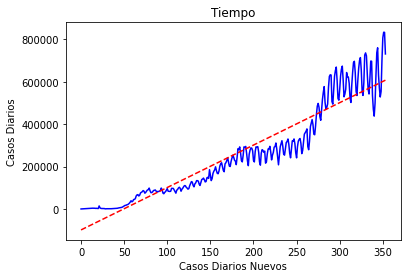

In [19]:
plt.xlabel('Casos Diarios Nuevos')
plt.ylabel('Casos Diarios')
plt.title('Tiempo')

plt.plot(x, y,color='b')
plt.plot(x, reg.predict(x),color='r', linestyle= 'dashed')
plt.show()

**© Equipo 1**
- Paulina Cámara Vidales A01039839
- Melba Geraldine Consuelos Fernández A01410921
- Erick Francisco González Martínez A01039859
- Kevin Dueñas Aguirre A01283104
- Carlos Javier Barragán Carrión A01410357